In [ ]:
!pip install windrose

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from math import pi
from math import sqrt
from math import atan2

In [2]:
from windrose import WindroseAxes

In [3]:
df = pd.read_csv("../Final_csv/Florida.csv")

In [4]:
df = df.dropna()

In [5]:
df

,year,month,lat,lon,U2M,V2M,wind_speed,wind_direction,state
0,2020,5,-83.550482,30.052997,-3.420912,-7.252653,8.018953,-2.011530,Florida
1,2020,11,-83.550482,30.052997,-1.815948,-6.650823,6.894281,-1.837340,Florida
2,2020,10,-83.550482,30.052997,-2.710481,-6.873364,7.388494,-1.946419,Florida
3,2020,4,-83.550482,30.052997,-3.004606,-6.561380,7.216604,-2.000219,Florida
4,2020,12,-83.550482,30.052997,-0.760787,-5.614922,5.666229,-1.705470,Florida
...,...,...,...,...,...,...,...,...,...
21808,2020,7,-83.181840,30.442836,-4.100317,-7.017048,8.127211,-2.099619,Florida
21809,2020,3,-83.181840,30.442836,-2.527259,-6.046835,6.553721,-1.966678,Florida
21810,2020,2,-83.181840,30.442836,-1.822026,-5.907112,6.181727,-1.869984,Florida
21811,2020,1,-83.181840,30.442836,-0.243335,-5.056340,5.062192,-1.618884,Florida


In [6]:
df['wind_dir_trig_to_degrees'] = df['wind_direction'] * 180/pi 
df['wind_dir_trig_from_degrees'] = df['wind_dir_trig_to_degrees'] + 180
df['wind_dir_cardinal'] = 90 - df['wind_dir_trig_from_degrees']

In [7]:
df

,year,month,lat,lon,U2M,V2M,wind_speed,wind_direction,state,wind_dir_trig_to_degrees,wind_dir_trig_from_degrees,wind_dir_cardinal
0,2020,5,-83.550482,30.052997,-3.420912,-7.252653,8.018953,-2.011530,Florida,-115.252186,64.747814,25.252186
1,2020,11,-83.550482,30.052997,-1.815948,-6.650823,6.894281,-1.837340,Florida,-105.271849,74.728151,15.271849
2,2020,10,-83.550482,30.052997,-2.710481,-6.873364,7.388494,-1.946419,Florida,-111.521578,68.478422,21.521578
3,2020,4,-83.550482,30.052997,-3.004606,-6.561380,7.216604,-2.000219,Florida,-114.604122,65.395878,24.604122
4,2020,12,-83.550482,30.052997,-0.760787,-5.614922,5.666229,-1.705470,Florida,-97.716231,82.283769,7.716231
...,...,...,...,...,...,...,...,...,...,...,...,...
21808,2020,7,-83.181840,30.442836,-4.100317,-7.017048,8.127211,-2.099619,Florida,-120.299305,59.700695,30.299305
21809,2020,3,-83.181840,30.442836,-2.527259,-6.046835,6.553721,-1.966678,Florida,-112.682358,67.317642,22.682358
21810,2020,2,-83.181840,30.442836,-1.822026,-5.907112,6.181727,-1.869984,Florida,-107.142175,72.857825,17.142175
21811,2020,1,-83.181840,30.442836,-0.243335,-5.056340,5.062192,-1.618884,Florida,-92.755216,87.244784,2.755216


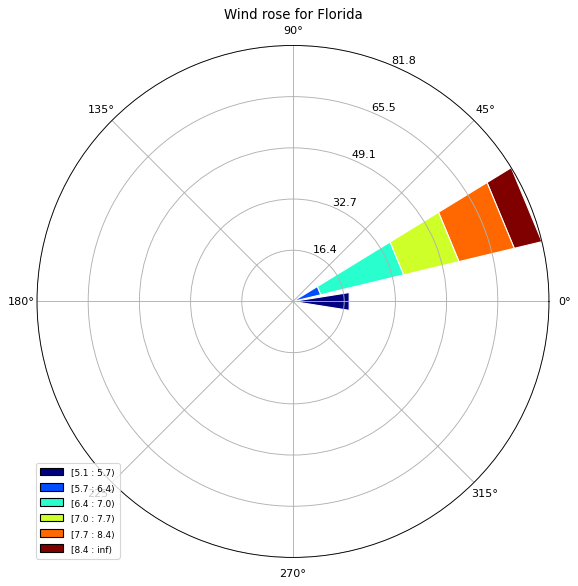

In [9]:
ax = WindroseAxes.from_ax()
ax.bar(df['wind_dir_trig_from_degrees'], df['wind_speed'], normed=True, opening=0.8, edgecolor='white')
plt.title("Wind rose for Florida")
ax.set_legend()

/Users/vanditapatidar/opt/anaconda3/lib/python3.8/site-packages/windrose/windrose.py:694: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(var, bins=bins, normed=True)


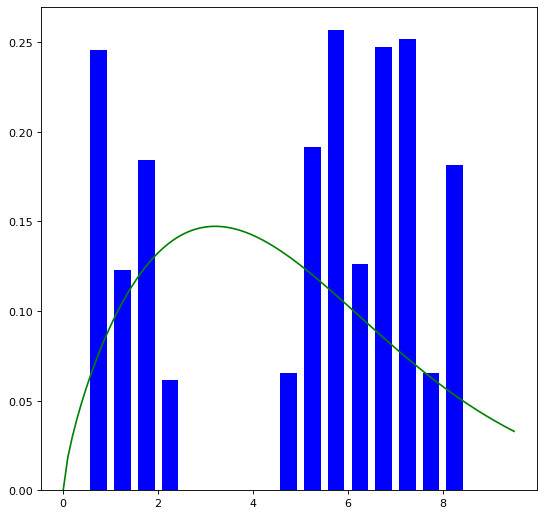

In [12]:
from windrose import WindAxes
ax = WindAxes.from_ax()
bins = np.arange(0, 9 + 1, 0.5)
bins = bins[1:]
ax, params = ax.pdf(df['wind_speed'], bins=bins)

In [10]:
print(params)

(1, 1.7154761389371966, 0, 5.330030861272796)


In [ ]:
import scipy.stats
wind = df["wind_speed"]
shape, loc, scale = scipy.stats.lognorm.fit(wind, floc=0)
fitted = scipy.stats.lognorm(shape, loc, scale)
plt.hist(wind, density=True, alpha=0.5)
support = np.linspace(wind.min(), wind.max(), 100)
plt.plot(support, fitted.pdf(support), "r-", lw=3)
plt.title("TLS wind speed in 2013", weight="bold")
plt.xlabel("Mean wind speed (km/h)");